<style>
    .section {
        background-color: #f7f7f7;
        border-radius: 8px;
        padding: 20px;
        box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
        margin-bottom: 20px;
        max-width: 1050px;
    }

    h1 {
        color: #0077b5;
        font-size: 32px;
        text-align: center;
        margin-bottom: 20px;
        text-decoration: underline;
    }

    h2 {
        color: #0077b5;
        font-size: 24px;
        margin-bottom: 10px;
        text-decoration: underline;
    }

    p {
        font-size: 18px;
        line-height: 1.6;
        margin-bottom: 10px;
        color: #333;
    }

    ol {
        color: #333;
    }


    li {
        margin-bottom: 5px;
    }

    .bullet {
        display: inline-block;
        width: 10px;
        height: 10px;
        border-radius: 50%;
        background-color: #0077b5;
        margin-right: 8px;
    }

    .linkedin-link {
        text-align: center;
        margin-top: 20px;
    }

    .linkedin-button {
        display: inline-block;
        background-color: #0077b5;
        color: #fff;
        padding: 15px 30px;
        border-radius: 40px;
        font-size: 18px;
        font-weight: bold;
        cursor: pointer;
        text-decoration: none;
        transition: background-color 0.3s ease;
    }

    .linkedin-button:hover {
        background-color: #005F96;
    }
</style>

<div class="section">
    <h1>Feature Engineering - Part : C</h1>
    <p>
        Feature engineering is the process of transforming raw data into informative and predictive features that can be used effectively by machine learning models.
    </p>
</div>

<div class="section">
    <h2>Different steps used: </h2>
    <ol>
        <li>Imputation.</li>
        <li>Handling Outliers.</li>
        <li>Variable Transformation</li>
        <li>Categorical Encoding.</li>
        <li>Descritization / Binning.</li>
        <li>Scalling</li>
        <li>Feature Creation</li>
    </ol>
</div>

<div class="section">
    <h2>Applications of Feature Engineering</h2>
    <p>
       Feature engineering is a fundamental step in the data preprocessing pipeline and plays a crucial role in various applications across different domains.
    </p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank">
        <button style="background-color: #0077b5; color: #fff; padding: 15px 30px; border-radius: 40px; font-size: 18px; font-weight: bold; cursor: pointer;">Find me on LinkedIn</button>
    </a>
</div>


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [142]:
data = {
    'age': np.random.randint(18, 65, 15),
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'income': np.random.randint(2000, 8000, 15),
    'education': ['High School', 'Bachelor', 'Master', 'PhD', 'High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'High School', 'Bachelor', 'Master', 'PhD'],
    'occupation': ['Engineer', 'Teacher', 'Doctor', 'Lawyer', 'Engineer', 'Teacher', 'Doctor', 'Lawyer', 'Engineer', 'Teacher', 'Doctor', 'Lawyer', 'Engineer', 'Teacher', 'Doctor'],
    'satisfaction': np.random.randint(1, 6, 15),
    'purchase_amount': np.random.randint(100, 1000, 15)
}

data['age'][2] = 0
data['income'][8] = 0
data['occupation'][11] = np.nan

data['purchase_amount'][12] = 5000

dfa = pd.DataFrame(data)

dfa['age'] = dfa['age'].replace(0, np.nan)
dfa['income'] = dfa['income'].replace(0, np.nan)

dfa


,age,gender,income,education,occupation,satisfaction,purchase_amount
0,58.0,Male,2071.0,High School,Engineer,5,900
1,40.0,Female,2438.0,Bachelor,Teacher,5,575
2,NaN,Female,7120.0,Master,Doctor,3,840
3,38.0,Male,4702.0,PhD,Lawyer,4,171
4,46.0,Male,3012.0,High School,Engineer,5,847
5,62.0,Female,7018.0,Bachelor,Teacher,3,795
6,37.0,Male,7192.0,Master,Doctor,1,224
7,26.0,Female,2872.0,PhD,Lawyer,4,105
8,64.0,Female,NaN,Bachelor,Engineer,5,497
9,38.0,Male,7331.0,Master,Teacher,1,133


1. Imputation (Dealing with missing values)

In [143]:
threshold = 0.7

##keeping those columns with missing values rate is lower than threshold
dfa = dfa[dfa.columns[dfa.isna().mean() < threshold]]

dfa

,age,gender,income,education,occupation,satisfaction,purchase_amount
0,58.0,Male,2071.0,High School,Engineer,5,900
1,40.0,Female,2438.0,Bachelor,Teacher,5,575
2,NaN,Female,7120.0,Master,Doctor,3,840
3,38.0,Male,4702.0,PhD,Lawyer,4,171
4,46.0,Male,3012.0,High School,Engineer,5,847
5,62.0,Female,7018.0,Bachelor,Teacher,3,795
6,37.0,Male,7192.0,Master,Doctor,1,224
7,26.0,Female,2872.0,PhD,Lawyer,4,105
8,64.0,Female,NaN,Bachelor,Engineer,5,497
9,38.0,Male,7331.0,Master,Teacher,1,133


In [144]:
##Checking that which attribute contains how many missing values
dfa.isna().sum()

age                1
gender             0
income             1
education          0
occupation         1
satisfaction       0
purchase_amount    0
dtype: int64

In [145]:
##Checking the datatypes of the attributes
dfa.dtypes

age                float64
gender              object
income             float64
education           object
occupation          object
satisfaction         int32
purchase_amount      int32
dtype: object

In [146]:
#numerical impuation
dfa["age"] = dfa["age"].fillna(dfa["age"].mean())
dfa["income"] = dfa["income"].fillna(dfa["income"].mean())

#categorical imputation
dfa["occupation"] = dfa["occupation"].fillna(dfa["occupation"].mode()[0])
##mode() represents the most frequent occuring value, and [0] selected 1st value in series

dfa.isna().sum()

age                0
gender             0
income             0
education          0
occupation         0
satisfaction       0
purchase_amount    0
dtype: int64

2. Handling outliers

<Axes: >

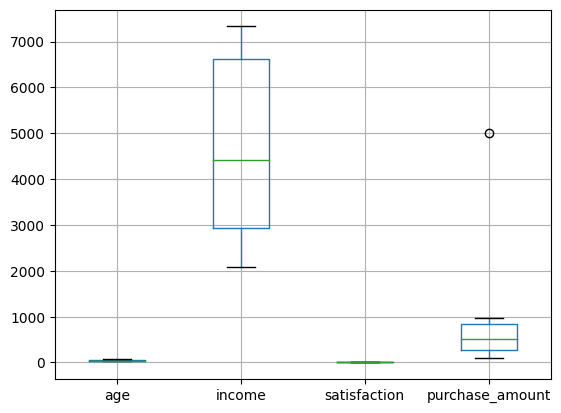

In [147]:
##selecting those columns only whose datatype is integer or a float

numeric_columns = dfa.select_dtypes(include=['int', 'float'])

numeric_columns.boxplot()

##so only purchase_amount attribute contains the outlier

In [148]:
Q1 = dfa["purchase_amount"].quantile(0.25)
Q3 = dfa["purchase_amount"].quantile(0.75)

IQR = Q3 - Q1

lower_extreme = Q1-1.5*IQR
upper_extreme = Q3+1.5*IQR

In [149]:
##detecting outliers
outliers = dfa[(dfa['purchase_amount'] < lower_extreme) | (dfa['purchase_amount'] > upper_extreme)]
outliers

,age,gender,income,education,occupation,satisfaction,purchase_amount
12,36.0,Female,2861.0,Bachelor,Engineer,2,5000


<Axes: >

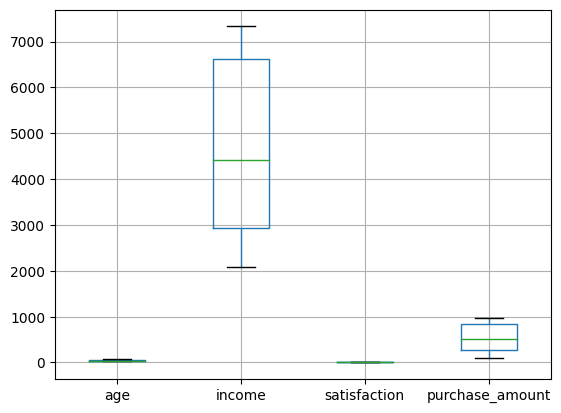

In [150]:
##replacing oulier with mean
dfa.loc[dfa['purchase_amount'] < lower_extreme, "purchase_amount"] = dfa["purchase_amount"].mean()
dfa.loc[dfa['purchase_amount'] > upper_extreme, "purchase_amount"] = dfa["purchase_amount"].mean()

dfa.boxplot()


3. Variable transformation

In [151]:
def convert(s):
    dfa[s] = dfa[s].astype('int64')

fl = list(dfa.select_dtypes('float'))   #selecting all those attribute with float datatype

for k in fl:
    convert(k)

dfa

,age,gender,income,education,occupation,satisfaction,purchase_amount
0,58,Male,2071,High School,Engineer,5,900
1,40,Female,2438,Bachelor,Teacher,5,575
2,41,Female,7120,Master,Doctor,3,840
3,38,Male,4702,PhD,Lawyer,4,171
4,46,Male,3012,High School,Engineer,5,847
5,62,Female,7018,Bachelor,Teacher,3,795
6,37,Male,7192,Master,Doctor,1,224
7,26,Female,2872,PhD,Lawyer,4,105
8,64,Female,4657,Bachelor,Engineer,5,497
9,38,Male,7331,Master,Teacher,1,133


In [152]:
dfa["income_log"] = np.log(dfa["income"])
dfa["purchase_amount_scale"] = (dfa["purchase_amount"] - dfa["purchase_amount"].mean())/dfa["purchase_amount"].std()
dfa

,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale
0,58,Male,2071,High School,Engineer,5,900,7.635787,1.162885
1,40,Female,2438,Bachelor,Teacher,5,575,7.798933,0.091836
2,41,Female,7120,Master,Doctor,3,840,8.870663,0.965153
3,38,Male,4702,PhD,Lawyer,4,171,8.455743,-1.239561
4,46,Male,3012,High School,Engineer,5,847,8.010360,0.988222
5,62,Female,7018,Bachelor,Teacher,3,795,8.856234,0.816854
6,37,Male,7192,Master,Doctor,1,224,8.880725,-1.064898
7,26,Female,2872,PhD,Lawyer,4,105,7.962764,-1.457067
8,64,Female,4657,Bachelor,Engineer,5,497,8.446127,-0.165216
9,38,Male,7331,Master,Teacher,1,133,8.899867,-1.364792


4. Categorical Encoding

In [153]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [154]:
## one-hot encoding
df_one_hot = pd.get_dummies(dfa, columns=['gender', 'education', 'occupation'])
df_one_hot = df_one_hot.replace({True:1, False:0})
dfb = df_one_hot.copy()
dfb

,age,income,satisfaction,purchase_amount,income_log,purchase_amount_scale,gender_Female,gender_Male,education_Bachelor,education_High School,education_Master,education_PhD,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Teacher
0,58,2071,5,900,7.635787,1.162885,0,1,0,1,0,0,0,1,0,0
1,40,2438,5,575,7.798933,0.091836,1,0,1,0,0,0,0,0,0,1
2,41,7120,3,840,8.870663,0.965153,1,0,0,0,1,0,1,0,0,0
3,38,4702,4,171,8.455743,-1.239561,0,1,0,0,0,1,0,0,1,0
4,46,3012,5,847,8.010360,0.988222,0,1,0,1,0,0,0,1,0,0
5,62,7018,3,795,8.856234,0.816854,1,0,1,0,0,0,0,0,0,1
6,37,7192,1,224,8.880725,-1.064898,0,1,0,0,1,0,1,0,0,0
7,26,2872,4,105,7.962764,-1.457067,1,0,0,0,0,1,0,0,1,0
8,64,4657,5,497,8.446127,-0.165216,1,0,1,0,0,0,0,1,0,0
9,38,7331,1,133,8.899867,-1.364792,0,1,0,0,1,0,0,0,0,1


In [155]:
## Label encoding
dfa['gender'] = dfa['gender'].map({'Male':1, 'Female':0})
# dfa['gender'] = np.where(dfa['gender']=="Male", 1, 0)
dfa

,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale
0,58,1,2071,High School,Engineer,5,900,7.635787,1.162885
1,40,0,2438,Bachelor,Teacher,5,575,7.798933,0.091836
2,41,0,7120,Master,Doctor,3,840,8.870663,0.965153
3,38,1,4702,PhD,Lawyer,4,171,8.455743,-1.239561
4,46,1,3012,High School,Engineer,5,847,8.010360,0.988222
5,62,0,7018,Bachelor,Teacher,3,795,8.856234,0.816854
6,37,1,7192,Master,Doctor,1,224,8.880725,-1.064898
7,26,0,2872,PhD,Lawyer,4,105,7.962764,-1.457067
8,64,0,4657,Bachelor,Engineer,5,497,8.446127,-0.165216
9,38,1,7331,Master,Teacher,1,133,8.899867,-1.364792


5. Descretization or Binning

In [160]:
no_of_bins = 3
bin_labels = ['low', 'medium', 'high']

dfa["income_bin"] = pd.cut(dfa["income"], bins=no_of_bins, labels=bin_labels)

dfa["purchase_amount_bin"] = pd.qcut(dfa["purchase_amount"], q=3, labels=bin_labels)

dfa

,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale,income_bin,purchase_amount_bin
0,58,1,2071,High School,Engineer,5,900,7.635787,1.162885,low,high
1,40,0,2438,Bachelor,Teacher,5,575,7.798933,0.091836,low,medium
2,41,0,7120,Master,Doctor,3,840,8.870663,0.965153,high,high
3,38,1,4702,PhD,Lawyer,4,171,8.455743,-1.239561,medium,low
4,46,1,3012,High School,Engineer,5,847,8.010360,0.988222,low,high
5,62,0,7018,Bachelor,Teacher,3,795,8.856234,0.816854,high,medium
6,37,1,7192,Master,Doctor,1,224,8.880725,-1.064898,high,low
7,26,0,2872,PhD,Lawyer,4,105,7.962764,-1.457067,low,low
8,64,0,4657,Bachelor,Engineer,5,497,8.446127,-0.165216,medium,medium
9,38,1,7331,Master,Teacher,1,133,8.899867,-1.364792,high,low


6. Scalling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
## Standard z-score scalling/normalization

dfc = dfa.copy()

numeric_columns = ['income', 'purchase_amount']

##Initializing the scalar object
##The StandardScaler scales the data by subtracting the mean and dividing by std.
scaler = StandardScaler()

dfc[numeric_columns] = scaler.fit_transform(dfc[numeric_columns])

dfc


,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale,income_bin,purchase_amount_bin
0,58,1,-1.420177,High School,Engineer,5,1.203700,7.635787,1.162885,low,high
1,40,0,-1.218649,Bachelor,Teacher,5,0.095059,7.798933,0.091836,low,medium
2,41,0,1.352342,Master,Doctor,3,0.999028,8.870663,0.965153,high,high
3,38,1,0.024564,PhD,Lawyer,4,-1.283068,8.455743,-1.239561,medium,low
4,46,1,-0.903453,High School,Engineer,5,1.022907,8.010360,0.988222,low,high
5,62,0,1.296332,Bachelor,Teacher,3,0.845524,8.856234,0.816854,high,medium
6,37,1,1.391879,Master,Doctor,1,-1.102274,8.880725,-1.064898,high,low
7,26,0,-0.980330,PhD,Lawyer,4,-1.508207,7.962764,-1.457067,low,low
8,64,0,-0.000146,Bachelor,Engineer,5,-0.171015,8.446127,-0.165216,medium,medium
9,38,1,1.468207,Master,Teacher,1,-1.412694,8.899867,-1.364792,high,low


7. Feature Creation

In [164]:
bins_no = [18, 25, 35, 50, 65]
bin_labels = ['18-25', '26-35', '36-50', '51-65']
dfc["age_group"] = pd.cut(dfc["age"], bins = bins_no, labels = bin_labels)
dfc

,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale,income_bin,purchase_amount_bin,age_group
0,58,1,-1.420177,High School,Engineer,5,1.203700,7.635787,1.162885,low,high,51-65
1,40,0,-1.218649,Bachelor,Teacher,5,0.095059,7.798933,0.091836,low,medium,36-50
2,41,0,1.352342,Master,Doctor,3,0.999028,8.870663,0.965153,high,high,36-50
3,38,1,0.024564,PhD,Lawyer,4,-1.283068,8.455743,-1.239561,medium,low,36-50
4,46,1,-0.903453,High School,Engineer,5,1.022907,8.010360,0.988222,low,high,36-50
5,62,0,1.296332,Bachelor,Teacher,3,0.845524,8.856234,0.816854,high,medium,51-65
6,37,1,1.391879,Master,Doctor,1,-1.102274,8.880725,-1.064898,high,low,36-50
7,26,0,-0.980330,PhD,Lawyer,4,-1.508207,7.962764,-1.457067,low,low,26-35
8,64,0,-0.000146,Bachelor,Engineer,5,-0.171015,8.446127,-0.165216,medium,medium,51-65
9,38,1,1.468207,Master,Teacher,1,-1.412694,8.899867,-1.364792,high,low,36-50


> Here we have 2 Datasets

> One-hot encoded

In [165]:
dfb

,age,income,satisfaction,purchase_amount,income_log,purchase_amount_scale,gender_Female,gender_Male,education_Bachelor,education_High School,education_Master,education_PhD,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Teacher,income_bin,purchase_amount_bin
0,58,2071,5,900,7.635787,1.162885,0,1,0,1,0,0,0,1,0,0,low,high
1,40,2438,5,575,7.798933,0.091836,1,0,1,0,0,0,0,0,0,1,low,medium
2,41,7120,3,840,8.870663,0.965153,1,0,0,0,1,0,1,0,0,0,high,high
3,38,4702,4,171,8.455743,-1.239561,0,1,0,0,0,1,0,0,1,0,medium,low
4,46,3012,5,847,8.010360,0.988222,0,1,0,1,0,0,0,1,0,0,low,high
5,62,7018,3,795,8.856234,0.816854,1,0,1,0,0,0,0,0,0,1,high,high
6,37,7192,1,224,8.880725,-1.064898,0,1,0,0,1,0,1,0,0,0,high,low
7,26,2872,4,105,7.962764,-1.457067,1,0,0,0,0,1,0,0,1,0,low,low
8,64,4657,5,497,8.446127,-0.165216,1,0,1,0,0,0,0,1,0,0,medium,medium
9,38,7331,1,133,8.899867,-1.364792,0,1,0,0,1,0,0,0,0,1,high,low


> final dataframe

In [166]:
dfc

,age,gender,income,education,occupation,satisfaction,purchase_amount,income_log,purchase_amount_scale,income_bin,purchase_amount_bin,age_group
0,58,1,-1.420177,High School,Engineer,5,1.203700,7.635787,1.162885,low,high,51-65
1,40,0,-1.218649,Bachelor,Teacher,5,0.095059,7.798933,0.091836,low,medium,36-50
2,41,0,1.352342,Master,Doctor,3,0.999028,8.870663,0.965153,high,high,36-50
3,38,1,0.024564,PhD,Lawyer,4,-1.283068,8.455743,-1.239561,medium,low,36-50
4,46,1,-0.903453,High School,Engineer,5,1.022907,8.010360,0.988222,low,high,36-50
5,62,0,1.296332,Bachelor,Teacher,3,0.845524,8.856234,0.816854,high,medium,51-65
6,37,1,1.391879,Master,Doctor,1,-1.102274,8.880725,-1.064898,high,low,36-50
7,26,0,-0.980330,PhD,Lawyer,4,-1.508207,7.962764,-1.457067,low,low,26-35
8,64,0,-0.000146,Bachelor,Engineer,5,-0.171015,8.446127,-0.165216,medium,medium,51-65
9,38,1,1.468207,Master,Teacher,1,-1.412694,8.899867,-1.364792,high,low,36-50
